<a href="https://colab.research.google.com/github/fjadidi2001/Machine_Learning_Journey/blob/main/ML_s9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


The provided code snippet is written in Python and uses the TensorFlow library, specifically its Keras API, to define a neural network model.

Here’s a breakdown of the code:

1. **Import Statements**:
   - `from tensorflow.keras.models import Sequential`: This imports the `Sequential` class, which is used to create a linear stack of layers.
   - `from tensorflow.keras.layers import Dense`: This imports the `Dense` layer class, which is a fully connected layer commonly used in neural networks.

2. **Model Creation**:
   - `model = Sequential([...])`: This line initializes a new Sequential model, which will contain a sequence of layers.

3. **Adding Layers**:
   - `Dense(128, activation='relu')`: This adds a dense layer with 128 neurons and uses the ReLU (Rectified Linear Unit) activation function. ReLU introduces non-linearity into the model, allowing it to learn more complex patterns.
   - `Dense(10, activation='softmax')`: This adds another dense layer with 10 neurons, using the softmax activation function. This layer is typically used in the output layer for classification tasks with multiple classes (in this case, 10 classes). The softmax function converts the output into probabilities that sum to 1, making it suitable for multi-class classification.

In summary, this code defines a simple feedforward neural network with one hidden layer containing 128 neurons and an output layer for 10 classes, suitable for tasks such as image classification or other multi-class problems.


# TensorFlow Datasets (tfds)

In [2]:
import tensorflow_datasets as tfds
dataset = tfds.load('mnist', split='train')


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


The code snippet you provided is using the TensorFlow Datasets (TFDS) library to load the MNIST dataset, which comprises handwritten digits.

Here's a clear breakdown of the code:

1. **Importing the library**:
   ```python
   import tensorflow_datasets as tfds
   ```
   This line imports the TensorFlow Datasets library under the alias `tfds`. This library provides a collection of ready-to-use datasets for machine learning.

2. **Loading the MNIST dataset**:
   ```python
   dataset = tfds.load('mnist', split='train')
   ```
   This line loads the MNIST dataset, specifically the training split. The `tfds.load()` function fetches the dataset and prepares it for use, returning it as a `tf.data.Dataset` object, which is a format suitable for training machine learning models in TensorFlow.

In summary, this code loads the training portion of the MNIST handwritten digits dataset for further use in machine learning tasks.


# TensorFlow Hub

In [1]:
import tensorflow_hub as hub
model = hub.load('https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5')


The code snippet you've provided is written in Python and uses the TensorFlow Hub library to load a pre-trained deep learning model.

Here's a breakdown of what each part does:

1. **Import TensorFlow Hub**: The command `import tensorflow_hub as hub` imports the TensorFlow Hub library, which allows you to easily access pre-trained models and other reusable components.

2. **Load a Pre-trained Model**: The line `model = hub.load('https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5')` loads a specific pre-trained model from TensorFlow Hub. In this case, it is a ResNet V2 model with 50 layers, which is trained on the ImageNet dataset to extract feature vectors from images. The URL points to the specific version of the model.

After executing this code, the variable `model` will hold the loaded ResNet model, which you can then use to process images, extract features, or make predictions.


# Second Part

start a project with Tensor => small dataset

In [2]:
# Step 1: Import Libraries
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 2: Load and Preprocess the Dataset
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels reshaped to column vector

# Binary classification: Keep only two classes for simplicity
binary_indices = (y == 0) | (y == 1)  # Select two classes
X = X[binary_indices.flatten()]
y = y[binary_indices.flatten()]

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Step 7: Save and Load the Model
# Save the model
model.save('iris_binary_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('iris_binary_model.h5')

# Evaluate the loaded model
loaded_loss, loaded_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Test Loss: {loaded_loss:.4f}, Test Accuracy: {loaded_accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5063 - loss: 0.9322 - val_accuracy: 0.6250 - val_loss: 0.8102
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5396 - loss: 0.8419 - val_accuracy: 0.6250 - val_loss: 0.7660
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4667 - loss: 0.9315 - val_accuracy: 0.6250 - val_loss: 0.7239
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5375 - loss: 0.8080 - val_accuracy: 0.6250 - val_loss: 0.6836
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5146 - loss: 0.8112 - val_accuracy: 0.6250 - val_loss: 0.6453
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5125 - loss: 0.7183 - val_accuracy: 0.6250 - val_loss: 0.6094
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5854 - loss: 0.6348 - val_accuracy: 0.6875 - val_loss: 0.5757
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6062 - loss: 0.6345 - val_accuracy: 0.8125 - val_loss: 0.5439
Epoch 9/50


Test Loss: 0.0479, Test Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 1.0000 - loss: 0.0479
Loaded Model Test Loss: 0.0479, Test Accuracy: 1.0000


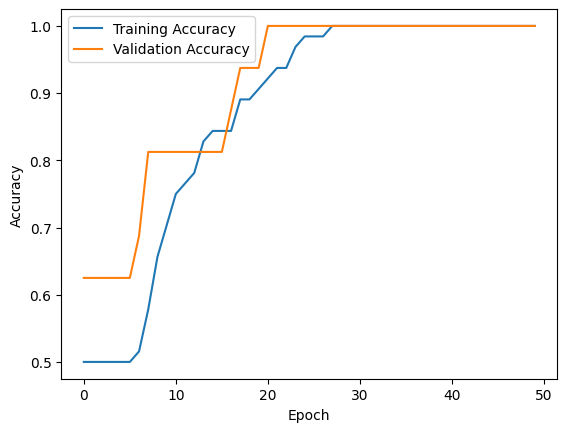

In [3]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Explanation of the Pipeline
1. Data Loading and Preprocessing
Iris Dataset: The dataset is loaded and reduced to two classes for binary classification.
Normalization: Features are standardized for faster convergence during training.
One-Hot Encoding: Labels are encoded into one-hot format to match the categorical loss function.
2. Model Building
A Sequential model with:
Input layer (Dense(16)): Fully connected with ReLU activation.
Hidden layer (Dense(8)): Adds non-linearity.
Output layer (Dense(2)): Outputs probabilities for each class with softmax.
3. Training
Use adam optimizer and categorical_crossentropy loss for training.
Train for 50 epochs with a validation split.
4. Evaluation
Evaluate the model using the test set to compute the loss and accuracy.
5. Save and Reload
Save the trained model to disk for future use.
Reload the model and verify its performance to ensure correctness.
